In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

In [13]:
df_china = pd.read_csv('output/merged_china.csv')
df_us = pd.read_csv('output/merged_us.csv')
df_india = pd.read_csv('output/merged_india.csv')

In [14]:
## TO DO
# come up with 2 EDA questions + 1 ML question
# ...

In [15]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 82 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       20 non-null     int64  
 1   co2                                                                                        20 non-null     float64
 2   co2_growth_prct                                                                            20 non-null     float64
 3   co2_growth_abs                                                                             20 non-null     float64
 4   co2_per_capita                                                                             20 non-null     float64
 5   share_global_co2                                    

In [16]:
india = df_india[['year','co2','country']]
china = df_china[['year','population','co2','country']]
us = df_us[['year','population','co2','country']]

df = pd.concat([india,china,us])

### Does number of population influence the amount of co2?

In [17]:
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 82 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       20 non-null     int64  
 1   co2                                                                                        20 non-null     float64
 2   co2_growth_prct                                                                            20 non-null     float64
 3   co2_growth_abs                                                                             20 non-null     float64
 4   co2_per_capita                                                                             20 non-null     float64
 5   share_global_co2                                    

In [18]:
print(len(df_china))
print(len(df_india))
print(len(df_us))

20
20
20


In [19]:
india = df_india[['year','population','co2','country']]
china = df_china[['year','population','co2','country']]
us = df_us[['year','population','co2','country']]

df = pd.concat([india,china,us])

In [20]:
len(df)

60

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        60 non-null     int64  
 1   population  60 non-null     float64
 2   co2         60 non-null     float64
 3   country     60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


In [22]:
fig = px.line(df, x="year", y="population", title='population of each country',color='country')
fig.show()

In [23]:
fig = px.line(df, x="year", y="co2", title='population of each country',color='country')
fig.show()

In [24]:
fig = px.scatter(df, x="population", y="co2",color='country',)
fig.show()

### What features correlated with amount of co2

In [25]:
list2 = ['co2','population', 'gdp',
       'Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'Cereal yield (kg per hectare)',
       'Electric power consumption (kWh per capita)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from nuclear sources (% of total)',
       'Electricity production from oil sources (% of total)',
       'Electricity production from renewable sources, excluding hydroelectric (% of total)',
       'Electricity production from renewable sources, excluding hydroelectric (kWh)',
       'Energy use (kg of oil equivalent per capita)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Methane emissions (% change from 1990)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (% change from 1990)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Population, total',
       'Renewable electricity output (% of total electricity output)',
       'Renewable energy consumption (% of total final energy consumption)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban population', 'Urban population (% of total population)',
       'Urban population growth (annual %)']

In [26]:
china = df_china[list2]
india = df_india[list2]
us = df_us[list2]

In [27]:
df = pd.concat([china,india,us])

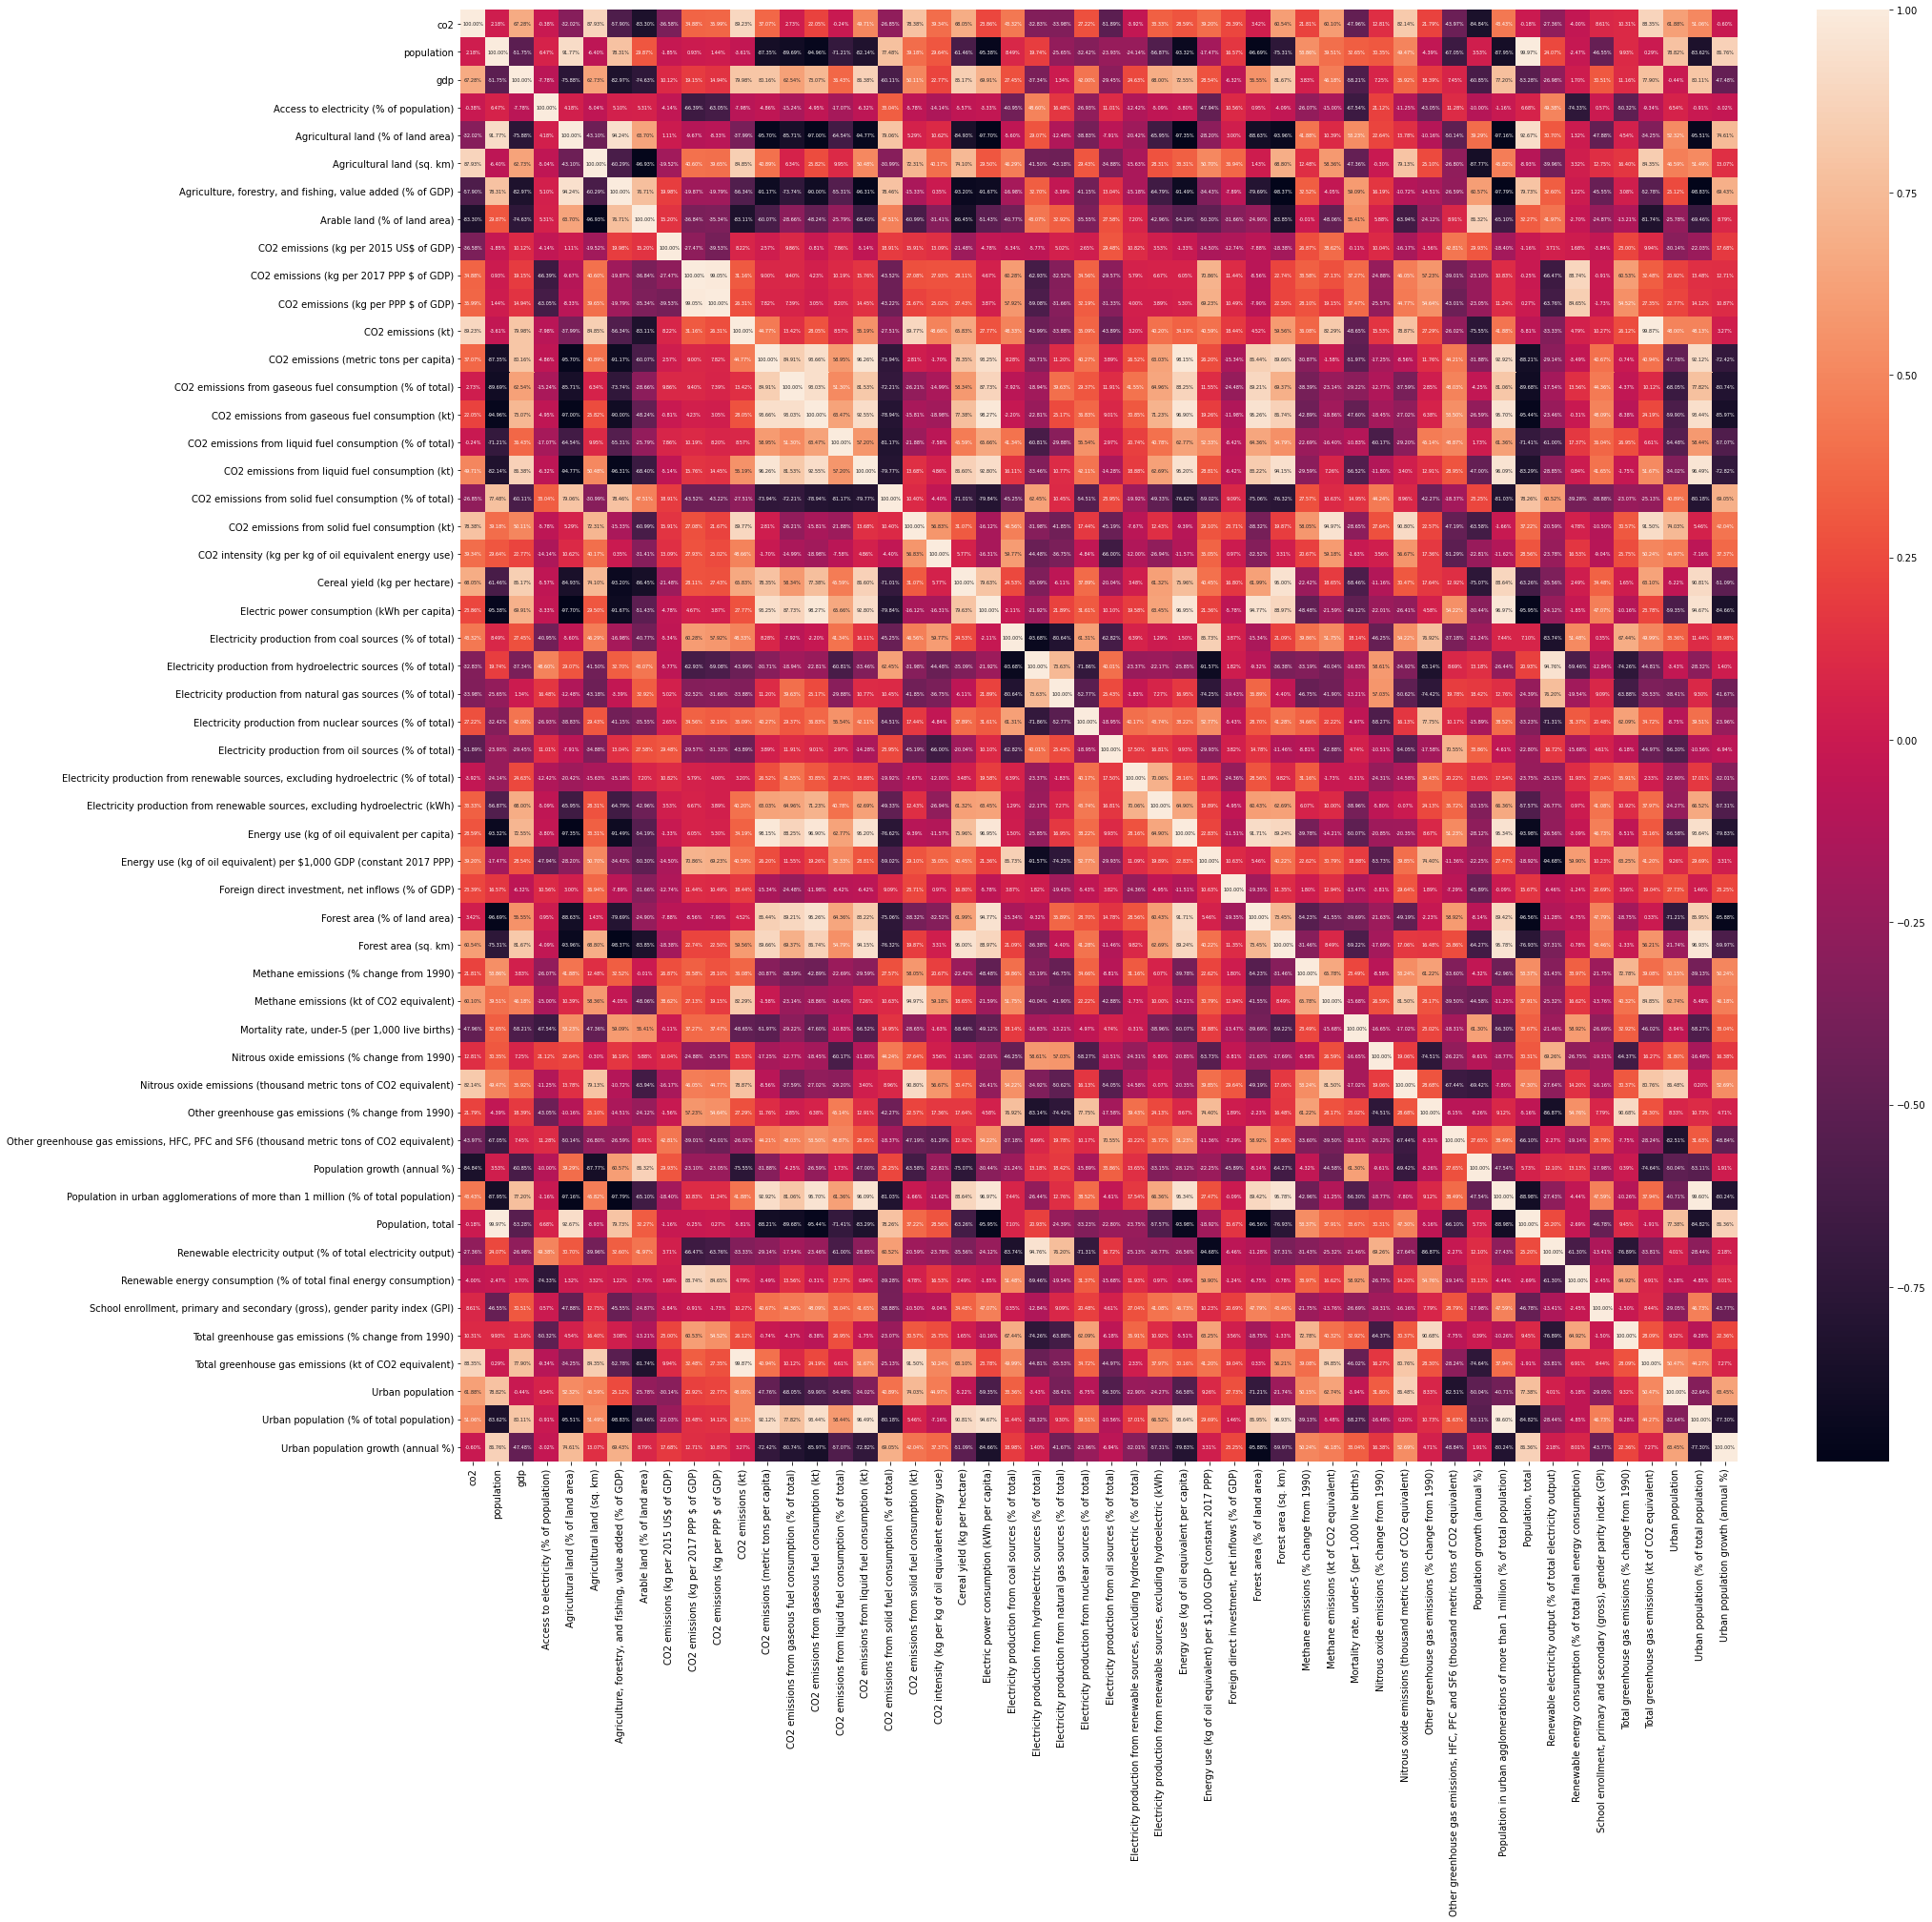

In [28]:
plt.figure(figsize=(30, 28))
hm = sns.heatmap(df.corr(),annot=True,annot_kws={"size": 5}, fmt=".2%")

In [29]:
df = pd.concat([df_china,df_india,df_us])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 19
Data columns (total 82 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   year                                                                                       60 non-null     int64  
 1   co2                                                                                        60 non-null     float64
 2   co2_growth_prct                                                                            60 non-null     float64
 3   co2_growth_abs                                                                             60 non-null     float64
 4   co2_per_capita                                                                             60 non-null     float64
 5   share_global_co2                                    

### Does gdp influence the amount of co2?

In [31]:
df['gdp']

0     6.329737e+12
1     6.814494e+12
2     7.248623e+12
3     7.830953e+12
4     8.602940e+12
5     9.489543e+12
6     1.035821e+13
7     1.079915e+13
8     1.157254e+13
9     1.285881e+13
10    1.367316e+13
11    1.435813e+13
12    1.530443e+13
13    1.622086e+13
14    1.671095e+13
15    1.725547e+13
16    1.757508e+13
17    1.815162e+13
18    4.908021e+12
19    4.936856e+12
0     2.906878e+12
1     2.989576e+12
2     3.212954e+12
3     3.454211e+12
4     3.709371e+12
5     4.024059e+12
6     4.355554e+12
7     4.601842e+12
8     4.945731e+12
9     5.314517e+12
10    5.675667e+12
11    5.949388e+12
12    6.320316e+12
13    6.754741e+12
14    7.259603e+12
15    7.767450e+12
16    8.275647e+12
17    8.835758e+12
18    3.021174e+12
19    3.056885e+12
0     1.310047e+13
1     1.333449e+13
2     1.370881e+13
3     1.422788e+13
4     1.470373e+13
5     1.509588e+13
6     1.536446e+13
7     1.531973e+13
8     1.489429e+13
9     1.527062e+13
10    1.550930e+13
11    1.584964e+13
12    1.6108

In [32]:
df['co2']

0      3514.934
1      3872.595
2      4545.014
3      5223.755
4      5876.555
5      6488.804
6      6978.612
7      7496.832
8      7886.533
9      8616.653
10     9528.556
11     9775.622
12     9952.744
13     9985.583
14     9848.420
15     9720.444
16     9920.459
17    10289.990
18    10489.989
19    10667.887
0       992.560
1      1023.027
2      1059.616
3      1125.471
4      1185.953
5      1259.744
6      1358.152
7      1462.815
8      1612.817
9      1677.888
10     1780.130
11     1963.586
12     2036.937
13     2185.856
14     2268.567
15     2382.223
16     2433.856
17     2599.806
18     2625.968
19     2441.792
0      5904.882
1      5946.771
2      6011.837
3      6114.007
4      6134.521
5      6051.668
6      6131.004
7      5914.078
8      5478.210
9      5675.786
10     5540.173
11     5338.698
12     5474.257
13     5522.807
14     5371.771
15     5248.024
16     5207.751
17     5375.491
18     5255.816
19     4712.771
Name: co2, dtype: float64

In [33]:
fig = px.scatter(df, x="gdp", y="co2",color='country')
fig.show()

In [34]:
fig = px.line(df, x="year", y="gdp", title='gdp of each country',color='country')
fig.show()

In [35]:
fig = px.line(df, x="year", y="co2", title='co2 of each country',color='country')
fig.show()

# Feature Engineering

In [21]:
df = pd.get_dummies(df)

In [22]:
df

,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,coal_co2,...,Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %),iso_code_CHN,iso_code_IND,iso_code_USA,country_China,country_India,country_United States
0,2001,3514.934,2.20,75.782,2.706,13.81,78398.967,7.32,0.555000,2428.857,...,4.791440e+06,471767321.0,37.093,4.059566,1,0,0,1,0,0
1,2002,3872.595,10.18,357.662,2.962,14.87,82271.562,7.50,0.568000,2778.770,...,5.100860e+06,491993700.0,38.425,4.198001,1,0,0,1,0,0
2,2003,4545.014,17.36,672.419,3.456,16.61,86816.576,7.72,0.627000,3319.280,...,5.717660e+06,512473984.0,39.776,4.078404,1,0,0,1,0,0
3,2004,5223.755,14.93,678.741,3.948,18.25,92040.331,7.99,0.667000,3835.288,...,6.467060e+06,533257098.0,41.144,3.975372,1,0,0,1,0,0
4,2005,5876.555,12.50,652.801,4.416,19.85,97916.886,8.28,0.683000,4424.390,...,7.194480e+06,554367818.0,42.522,3.882473,1,0,0,1,0,0
5,2006,6488.804,10.42,612.248,4.848,21.22,104405.690,8.61,0.684000,4905.374,...,7.879330e+06,575118254.0,43.868,3.674728,1,0,0,1,0,0
6,2007,6978.612,7.55,489.808,5.185,22.16,111384.302,8.95,0.674000,5289.904,...,8.497040e+06,595670841.0,45.199,3.511256,1,0,0,1,0,0
7,2008,7496.832,7.43,518.220,5.539,23.38,118881.134,9.31,0.694000,5729.474,...,8.786120e+06,616481190.0,46.539,3.433958,1,0,0,1,0,0
8,2009,7886.533,5.20,389.701,5.794,24.95,126767.667,9.69,0.682000,6028.500,...,9.377660e+06,637407288.0,47.880,3.338102,1,0,0,1,0,0
9,2010,8616.653,9.26,730.120,6.295,25.84,135384.319,10.09,0.670000,6568.794,...,1.020382e+07,658498663.0,49.226,3.255365,1,0,0,1,0,0


In [23]:
X = df.drop('co2',axis=1)
y = df['co2']

In [24]:
X

,year,co2_growth_prct,co2_growth_abs,co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,coal_co2,cement_co2,...,Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %),iso_code_CHN,iso_code_IND,iso_code_USA,country_China,country_India,country_United States
0,2001,2.20,75.782,2.706,13.81,78398.967,7.32,0.555000,2428.857,270.828,...,4.791440e+06,471767321.0,37.093,4.059566,1,0,0,1,0,0
1,2002,10.18,357.662,2.962,14.87,82271.562,7.50,0.568000,2778.770,296.590,...,5.100860e+06,491993700.0,38.425,4.198001,1,0,0,1,0,0
2,2003,17.36,672.419,3.456,16.61,86816.576,7.72,0.627000,3319.280,345.186,...,5.717660e+06,512473984.0,39.776,4.078404,1,0,0,1,0,0
3,2004,14.93,678.741,3.948,18.25,92040.331,7.99,0.667000,3835.288,379.992,...,6.467060e+06,533257098.0,41.144,3.975372,1,0,0,1,0,0
4,2005,12.50,652.801,4.416,19.85,97916.886,8.28,0.683000,4424.390,411.649,...,7.194480e+06,554367818.0,42.522,3.882473,1,0,0,1,0,0
5,2006,10.42,612.248,4.848,21.22,104405.690,8.61,0.684000,4905.374,470.087,...,7.879330e+06,575118254.0,43.868,3.674728,1,0,0,1,0,0
6,2007,7.55,489.808,5.185,22.16,111384.302,8.95,0.674000,5289.904,514.981,...,8.497040e+06,595670841.0,45.199,3.511256,1,0,0,1,0,0
7,2008,7.43,518.220,5.539,23.38,118881.134,9.31,0.694000,5729.474,525.924,...,8.786120e+06,616481190.0,46.539,3.433958,1,0,0,1,0,0
8,2009,5.20,389.701,5.794,24.95,126767.667,9.69,0.682000,6028.500,583.560,...,9.377660e+06,637407288.0,47.880,3.338102,1,0,0,1,0,0
9,2010,9.26,730.120,6.295,25.84,135384.319,10.09,0.670000,6568.794,639.592,...,1.020382e+07,658498663.0,49.226,3.255365,1,0,0,1,0,0


In [25]:
y

0      3514.934
1      3872.595
2      4545.014
3      5223.755
4      5876.555
5      6488.804
6      6978.612
7      7496.832
8      7886.533
9      8616.653
10     9528.556
11     9775.622
12     9952.744
13     9985.583
14     9848.420
15     9720.444
16     9920.459
17    10289.990
18    10489.989
19    10667.887
0       992.560
1      1023.027
2      1059.616
3      1125.471
4      1185.953
5      1259.744
6      1358.152
7      1462.815
8      1612.817
9      1677.888
10     1780.130
11     1963.586
12     2036.937
13     2185.856
14     2268.567
15     2382.223
16     2433.856
17     2599.806
18     2625.968
19     2441.792
0      5904.882
1      5946.771
2      6011.837
3      6114.007
4      6134.521
5      6051.668
6      6131.004
7      5914.078
8      5478.210
9      5675.786
10     5540.173
11     5338.698
12     5474.257
13     5522.807
14     5371.771
15     5248.024
16     5207.751
17     5375.491
18     5255.816
19     4712.771
Name: co2, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
len(X_train)

48

In [28]:
feature_names = X_train.columns

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

## Boruta

In [32]:
rf =RandomForestRegressor(n_jobs=-1, max_depth =64)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state = 1)

In [33]:
feat_selector.fit(X_train, y_train)

BorutaPy(estimator=RandomForestRegressor(max_depth=64, n_estimators=13,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x193E674FC40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x193E674FC40)

In [34]:
feat_selector.support_

array([False, False, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [35]:
feat_selector.ranking_

array([40, 34, 52,  7,  1, 11,  2, 56,  1,  1, 37,  7,  1,  1, 48,  2,  1,
        1, 34,  3,  2,  7, 32, 17,  1,  2, 24, 11,  2, 45, 13,  1,  3,  1,
        2, 22, 43, 28,  1, 20, 51, 47, 50,  2, 37, 42, 40,  2, 54, 55, 53,
       43, 33, 24, 26, 28, 16, 15, 36, 30, 11, 20, 22,  3, 31,  1,  2, 14,
        2,  3,  1, 40, 19, 46, 48,  2,  2,  3,  7, 57, 27, 58, 60, 17, 58])

In [36]:
X_train_filtered = feat_selector.transform(X_train)

In [37]:
X_train.shape

(48, 85)

In [38]:
X_train_filtered.shape

(48, 13)

In [39]:
X_test_filtered = feat_selector.transform(X_test)

In [40]:
X_test.shape

(12, 85)

In [41]:
X_test_filtered.shape

(12, 13)

In [42]:
feature_ranks = list(zip(feature_names,
                        feat_selector.ranking_,
                        feat_selector.support_))

In [43]:
for feat in feature_ranks:
    print('Features: {:<30} Rank： {}, Keep: {}'.format(feat[0],feat[1],feat[2]))

Features: year                           Rank： 40, Keep: False
Features: co2_growth_prct                Rank： 34, Keep: False
Features: co2_growth_abs                 Rank： 52, Keep: False
Features: co2_per_capita                 Rank： 7, Keep: False
Features: share_global_co2               Rank： 1, Keep: True
Features: cumulative_co2                 Rank： 11, Keep: False
Features: share_global_cumulative_co2    Rank： 2, Keep: False
Features: co2_per_gdp                    Rank： 56, Keep: False
Features: coal_co2                       Rank： 1, Keep: True
Features: cement_co2                     Rank： 1, Keep: True
Features: gas_co2                        Rank： 37, Keep: False
Features: oil_co2                        Rank： 7, Keep: False
Features: cement_co2_per_capita          Rank： 1, Keep: True
Features: coal_co2_per_capita            Rank： 1, Keep: True
Features: gas_co2_per_capita             Rank： 48, Keep: False
Features: oil_co2_per_capita             Rank： 2, Keep: False
Featur

# Support Vector Machine

In [44]:
reg = LinearRegression().fit(X_train_filtered, y_train)

In [45]:
reg.score(X_train_filtered,y_train)

0.9995115377019017

In [46]:
reg.score(X_test_filtered,y_test)

0.9982522547661652

In [47]:
y_predicted = reg.predict(X_test_filtered)

In [48]:
print(mean_squared_error(y_test,y_predicted ))
print(math.sqrt(mean_squared_error(y_test, y_predicted)))

9534.224595603288
97.64335407800823


In [49]:
print(mean_absolute_error(y_test, y_predicted))

83.38908719192575


## RFECV

In [50]:
rf2 =RandomForestRegressor(n_jobs=-1, max_depth =64)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [51]:
rfe.fit(X_train, y_train)

RFECV(cv=3,
      estimator=RandomForestRegressor(max_depth=64, n_estimators=13, n_jobs=-1,
                                      random_state=RandomState(MT19937) at 0x193E674FC40))

In [52]:
X_train_filtered = rfe.transform(X_train)

In [53]:
X_train.shape

(48, 85)

In [54]:
X_train_filtered.shape

(48, 2)

In [55]:
X_test_filtered = rfe.transform(X_test)

In [56]:
X_test.shape

(12, 85)

In [57]:
X_test_filtered.shape

(12, 2)

In [58]:
feature_ranks = list(zip(feature_names,
                        rfe.ranking_,
                        rfe.support_))

In [59]:
for feat in feature_ranks:
    print('Features: {:<30} Rank： {}, Keep: {}'.format(feat[0],feat[1],feat[2]))

Features: year                           Rank： 69, Keep: False
Features: co2_growth_prct                Rank： 47, Keep: False
Features: co2_growth_abs                 Rank： 58, Keep: False
Features: co2_per_capita                 Rank： 13, Keep: False
Features: share_global_co2               Rank： 8, Keep: False
Features: cumulative_co2                 Rank： 4, Keep: False
Features: share_global_cumulative_co2    Rank： 55, Keep: False
Features: co2_per_gdp                    Rank： 45, Keep: False
Features: coal_co2                       Rank： 41, Keep: False
Features: cement_co2                     Rank： 16, Keep: False
Features: gas_co2                        Rank： 19, Keep: False
Features: oil_co2                        Rank： 30, Keep: False
Features: cement_co2_per_capita          Rank： 6, Keep: False
Features: coal_co2_per_capita            Rank： 3, Keep: False
Features: gas_co2_per_capita             Rank： 65, Keep: False
Features: oil_co2_per_capita             Rank： 15, Keep: Fa

# Support Vector Machine

In [60]:
reg2 = LinearRegression().fit(X_train_filtered, y_train)

In [61]:
reg2.score(X_train_filtered,y_train)

0.9793027121639178

In [62]:
reg2.score(X_test_filtered,y_test)

0.9400892982097211

In [63]:
y_predicted = reg2.predict(X_test_filtered)

In [64]:
print(mean_squared_error(y_test,y_predicted ))
print(math.sqrt(mean_squared_error(y_test, y_predicted)))

326822.282499042
571.683725935103


In [65]:
print(mean_absolute_error(y_test, y_predicted))

423.63393034978594


# ML Question

### 1. Clustering co2 according to Country

### 2. Regression predict co2 (not using time series, combine three country, if can, other country also)